### DBScan experiment with NetworkX ###
In this activity, we will demonstrate a simple implementation of the DBScan algorithm that uses the NetworkX package to conveniently identify the connected components of the graph formed during the points analysis. NetworkX will also be used to visualize the identified connected components.

In [1]:
#DBSCAN tryout using NetworkX
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [5]:
#Sample Points(2-dimensional)
points = np.array([[1.0, 1.7],
                   [2.1, 2.3],
                   [2.9, 2.1],
                   [4.5, 3.3],
                   [5.0, 3.6],
                   [5.6, 3.9],
                   [6.2, 4.3],
                   [6.5, 4.8],
                   [7.1, 9.3],
                   [9.1, 9.9],
                   [10.0, 8.9],
                   [11.0, 9.3],
                   [13.5, 10.1],
                   [17.0, 10.8],
                   [19.0, 11.1],
                   [19.5, 13.3],
                   [19.7, 15.3],
                   [19.9, 17.3],
                   [20.5, 17.4],
                   [25.0, 17.9],
                   [25.5, 17.2],
                   [25.7, 17.0],
                   [25.8, 17.6]])
eps = 1.5
minPts = 3

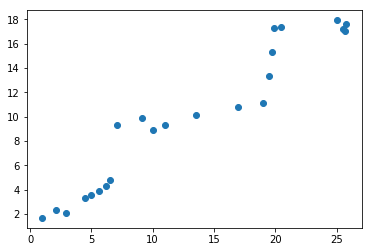

In [6]:
plt.subplot(111)
plt.scatter(points[:,0], points[:,1])
plt.show()

In [7]:
# Find core points with minPts as 4 and Euclidean distance as 1.5
neighborhoods = []
core = []
border = []
noise = []

for i in range(len(points)):
    neighbors = []
    for p in range(len(points)):
        # If the distance is below eps, p is a neighbor
        if np.linalg.norm(points[i] - points[p]) <= eps:
            neighbors.append(p)
    neighborhoods.append(neighbors)
    # If neighborhood has at least minPts, i is a core point
    if len(neighbors) > minPts :
        core.append(i)

print("core: ", core)

('core: ', [4, 5, 6, 19, 20, 21, 22])


In [8]:
# Find border points 
for i in range(len(points)):
    neighbors = neighborhoods[i]
    # Look at points that are not core points
    if len(neighbors) <= minPts:
        for j in range(len(neighbors)):
            # If one of its neighbors is a core, it is also in the core point's neighborhood, 
            # thus it is a border point rather than a noise point
            if neighbors[j] in core:
                border.append(i)
                # Need at least one core point...
                break

print("border: ", border)

('border: ', [3, 7])


In [9]:
# Find noise points
for i in range(len(points)):
    if i not in core and i not in border:
        noise.append(i)

print("noise", noise)

('noise', [0, 1, 2, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18])


In [10]:
# Invoke graph instance to visualize the cluster
G = nx.Graph()

In [11]:
# Add nodes -- core points + border points
nodes = core+border
G.add_nodes_from(nodes)

In [12]:
# Create neighborhood
for i in range(len(nodes)):
    for p in range(len(nodes)):
        # If the distance is below the threshold, add a link in the graph.
        if p != i and np.linalg.norm(points[nodes[i]] - points[nodes[p]]) <= eps:
            G.add_edges_from([(nodes[i], nodes[p])])

In [13]:
# List the connected components / clusters
clusters = list(nx.connected_components(G))
print("# clusters:", len(clusters))
print("clusters: ", clusters)

('# clusters:', 2)
('clusters: ', [set([3, 4, 5, 6, 7]), set([19, 20, 21, 22])])


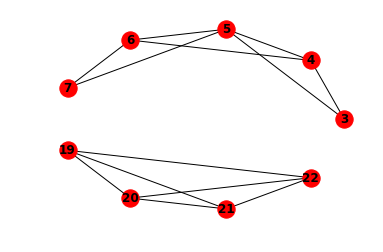

In [15]:
# Visualise the graph
plt.subplot(111)
nx.draw_circular(G, with_labels=True, font_weight='bold')
plt.show()